In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [8]:
df=pd.read_csv("employee_attrition_data.csv")
df.drop("EmpID",axis=1,inplace=True)
df

,Age,Experience,Salary,WorkHoursPerWeek,SatisfactionLevel,Attrition
0,50,25,54856,54,0.12,0
1,36,3,34200,55,0.15,1
2,29,18,89178,46,0.17,0
3,42,19,58997,53,0.64,0
4,40,32,50611,48,0.74,0
...,...,...,...,...,...,...
795,32,28,130432,44,0.86,0
796,29,0,102425,48,0.04,0
797,47,34,117949,52,0.79,0
798,26,5,102811,53,0.41,0


In [9]:
x=df.drop("Attrition",axis=1)
y=df["Attrition"]


In [10]:
x_train,x_test,y_train,y_test=train_test_split (x,y,test_size=0.2,random_state=42)

In [11]:
model=BaggingClassifier(
    estimator=DecisionTreeClassifier(),
)
model.fit(x_train,y_train)

,estimator,DecisionTreeClassifier()
,n_estimators,10
,max_samples,1.0
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,None
,random_state,None
,verbose,0


In [12]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1])

In [13]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.975

In [14]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[141,   1],
       [  3,  15]])

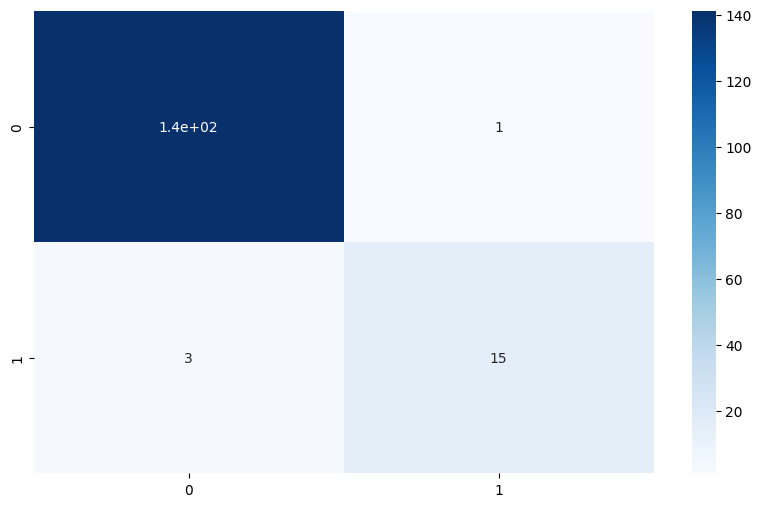

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,cmap="Blues")
plt.show()